Situation:  A manufacturing process is producing product that is not to spec.  There isn't any obvious reasons so we are looking to determine which features are the main influencers of the target specs (Target 1 and Target 2).  The difference in the two targets is that this spec is tested twice in the process, Target 1 is the later testing and the method is more reliable.  Target 2 is earlier in the process and unable to be tested the same way as Target 1, and has more variation.

In [1]:
#downloading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

There are 3 main process that collect data but the data collection doesn't merge well.  First we will import the data and combine it, preparing it for analysis.  Loading the first process data into a dataframe.

In [2]:
df1 = pd.read_csv('Process 1.csv')
df1.head()

,P1 Batch_Number,Process 1 START_TIME,Process 1 END_TIME,P1 Feature 1,P1 Feature 2,P1 Feature 3,P1 Feature 4,P1 Feature 5
0,835548,6/16/2023 16:50,6/16/2023 16:50,NaN,NaN,NaN,NaN,NaN
1,570976,10/24/2022 16:04,10/25/2022 15:26,NaN,NaN,NaN,21500.0,GRD501
2,570958,10/22/2022 12:30,10/24/2022 16:04,Raw Material 1,16.2,570958.0,21481.0,GRD501
3,570676,10/25/2022 21:37,10/25/2022 23:38,NaN,NaN,NaN,21514.0,NaN
4,499819,9/13/2023 21:37,9/14/2023 0:09,NaN,NaN,NaN,2330487.0,NaN


In [3]:
df1.shape

(1612, 8)

Loading the second process data into a dataframe

In [4]:
df2 = pd.read_csv('Process 2.csv')
df2.head()

,P2 Batch_Number,P2 Batch_Child,P2 Batch_Parent,P2 START_TIME,P2 END_TIME,P2 Feature 1,P2 Feature 2,P2 Feature 3,Target 2,P2 Feature 4,P2 Feature 5,P2 Feature 6,P2 Feature 7,P2 Feature 8,P2 Feature 9,P2 Feature 10,P2 Feature 11,P2 Feature 12
0,13272,59829.0,22169.0,11/30/2020 13:30,12/3/2020 13:15,99.2,58.4,NaN,NaN,NaN,NaN,R804,6678.383,1.722872,1.169222,0.655117,11.0,581
1,13267,59811.0,22169.0,11/30/2020 4:12,12/1/2020 11:55,NaN,NaN,0.68,3.0,7.0,NaN,R804,8074.866,1.781492,1.189442,0.656123,14.0,581
2,13263,59811.0,22169.0,11/29/2020 21:39,11/30/2020 19:26,NaN,NaN,0.84,3.0,6.8,NaN,R804,8907.036,1.783088,1.190846,0.656202,12.0,581
3,13259,59811.0,22169.0,11/29/2020 15:37,11/30/2020 19:07,NaN,NaN,0.96,1.0,6.8,NaN,R804,8922.198,1.781203,1.188748,0.656282,14.0,581
4,13254,59805.0,22167.0,11/29/2020 9:31,11/30/2020 8:05,NaN,NaN,0.84,3.0,6.8,NaN,R804,8992.614,1.780991,1.190788,0.656358,13.0,581


In [5]:
df2.shape

(660, 18)

merging the dataframes by the batch numbers

In [6]:
df4=pd.merge(df2,df1, left_on='P2 Batch_Parent', right_on='P1 Batch_Number')
df4.head()

,P2 Batch_Number,P2 Batch_Child,P2 Batch_Parent,P2 START_TIME,P2 END_TIME,P2 Feature 1,P2 Feature 2,P2 Feature 3,Target 2,P2 Feature 4,...,P2 Feature 11,P2 Feature 12,P1 Batch_Number,Process 1 START_TIME,Process 1 END_TIME,P1 Feature 1,P1 Feature 2,P1 Feature 3,P1 Feature 4,P1 Feature 5
0,14081,60513.0,22177.0,2/4/2021 2:43,2/5/2021 7:22,98.75,50.4,NaN,3.0,6.7,...,50.0,597,22177,2/1/2021 18:35,2/4/2021 11:03,Raw Material 7,9.37,22177.0,14058.0,NaN
1,14076,60513.0,22177.0,2/3/2021 21:00,2/4/2021 23:55,NaN,NaN,NaN,2.0,6.6,...,11.0,597,22177,2/1/2021 18:35,2/4/2021 11:03,Raw Material 7,9.37,22177.0,14058.0,NaN
2,14071,60506.0,22177.0,2/3/2021 15:36,2/4/2021 23:36,NaN,NaN,NaN,3.0,6.7,...,11.0,597,22177,2/1/2021 18:35,2/4/2021 11:03,Raw Material 7,9.37,22177.0,14058.0,NaN
3,14068,60506.0,22177.0,2/3/2021 9:49,2/4/2021 4:54,NaN,NaN,NaN,2.0,6.5,...,60.0,597,22177,2/1/2021 18:35,2/4/2021 11:03,Raw Material 7,9.37,22177.0,14058.0,NaN
4,14064,60503.0,22177.0,2/3/2021 3:09,2/4/2021 4:44,97.61,54.1,NaN,1.0,6.5,...,34.0,597,22177,2/1/2021 18:35,2/4/2021 11:03,Raw Material 7,9.37,22177.0,14058.0,NaN


In [7]:
df4.shape

(494, 26)

Notice that the all of the columns from Process 1 data were added teh Process 2 data, but the rows from Process 1 data that did not contain a batch number that matched Process 2 were dropped, reducing the total row count to 494.  Now adding the data from the third process into a new dataframe:

In [8]:
df3 = pd.read_csv('Process 3.csv')
df3.head()

,P3 Batch_Number,P3 Batch_Child,P3 Batch_Parent,P3 START_TIME,P3 END_TIME,P3 Feature 1,P3 Feature 2,P3 Feature 3,P3 Feature 4,P3 Feature 5,P3 Feature 6,Target 1,P3 Feature 7
0,68161,2464505893,68160,10/7/2023 0:17,NaN,NaN,98.65,78.45,48.2,NaN,20.0,3.6,2.1
1,68160,68160,2464446327,10/6/2023 10:36,10/7/2023 0:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68160,68160,68160,10/6/2023 10:33,10/7/2023 0:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68136,68136,2464213623,10/5/2023 10:59,10/5/2023 22:01,NaN,98.50,84.20,54.5,NaN,22.0,3.8,2.8
4,68136,68136,68136,10/5/2023 10:56,10/5/2023 19:27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df3.shape

(360, 13)

Now adding that Process 3 data to the merged dataframe of the other two processes:

In [10]:
df5=pd.merge(df4,df3, left_on='P2 Batch_Child', right_on='P3 Batch_Number')
df5.shape

(464, 39)

The new shape of the newly merged dataframe (df5) shows we've added all of the colunns from Process 3 (df3), and because not all of the data had a corresponding batch number in the process 3 data (df3), we've lost more rows of data.

In [11]:
df5.head()

,P2 Batch_Number,P2 Batch_Child,P2 Batch_Parent,P2 START_TIME,P2 END_TIME,P2 Feature 1,P2 Feature 2,P2 Feature 3,Target 2,P2 Feature 4,...,P3 START_TIME,P3 END_TIME,P3 Feature 1,P3 Feature 2,P3 Feature 3,P3 Feature 4,P3 Feature 5,P3 Feature 6,Target 1,P3 Feature 7
0,14081,60513.0,22177.0,2/4/2021 2:43,2/5/2021 7:22,98.75,50.4,NaN,3.0,6.7,...,2/4/2021 22:02,2/5/2021 8:15,1.0,98.70,NaN,51.0,100.0,15.0,NaN,0.9
1,14076,60513.0,22177.0,2/3/2021 21:00,2/4/2021 23:55,NaN,NaN,NaN,2.0,6.6,...,2/4/2021 22:02,2/5/2021 8:15,1.0,98.70,NaN,51.0,100.0,15.0,NaN,0.9
2,14071,60506.0,22177.0,2/3/2021 15:36,2/4/2021 23:36,NaN,NaN,NaN,3.0,6.7,...,2/4/2021 4:40,2/4/2021 10:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14068,60506.0,22177.0,2/3/2021 9:49,2/4/2021 4:54,NaN,NaN,NaN,2.0,6.5,...,2/4/2021 4:40,2/4/2021 10:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14064,60503.0,22177.0,2/3/2021 3:09,2/4/2021 4:44,97.61,54.1,NaN,1.0,6.5,...,2/3/2021 21:10,2/4/2021 16:25,1.0,98.65,NaN,56.2,99.9,14.0,NaN,0.8


In the data sample above we can see that our dataset has null values in Target 1 column.  We need to remove those to eliminate the batches that did not test for it.

In [12]:
df6=df5.dropna(subset=['Target 1'])
df6.head()

,P2 Batch_Number,P2 Batch_Child,P2 Batch_Parent,P2 START_TIME,P2 END_TIME,P2 Feature 1,P2 Feature 2,P2 Feature 3,Target 2,P2 Feature 4,...,P3 START_TIME,P3 END_TIME,P3 Feature 1,P3 Feature 2,P3 Feature 3,P3 Feature 4,P3 Feature 5,P3 Feature 6,Target 1,P3 Feature 7
369,2340190,67350.0,40359.0,6/29/2023 9:24,6/30/2023 22:28,NaN,NaN,0.59,4.0,6.3,...,6/30/2023 21:14,7/2/2023 2:58,1.0,97.2,NaN,42.5,100.0,16.0,5.0,1.2
370,2330365,67350.0,40358.0,6/29/2023 3:52,6/30/2023 22:25,96.95,39.5,0.24,4.0,6.0,...,6/30/2023 21:14,7/2/2023 2:58,1.0,97.2,NaN,42.5,100.0,16.0,5.0,1.2
371,2330366,67350.0,40299.0,6/29/2023 11:27,7/1/2023 8:28,NaN,NaN,0.70,3.0,4.4,...,6/30/2023 21:14,7/2/2023 2:58,1.0,97.2,NaN,42.5,100.0,16.0,5.0,1.2
372,2340189,67347.0,40358.0,6/29/2023 2:56,6/30/2023 21:39,NaN,NaN,0.34,4.0,6.5,...,6/30/2023 11:28,7/1/2023 7:06,1.0,98.5,NaN,40.5,100.0,18.0,4.3,1.7
373,2340188,67347.0,40358.0,6/28/2023 20:29,6/30/2023 12:13,NaN,NaN,0.75,4.0,6.3,...,6/30/2023 11:28,7/1/2023 7:06,1.0,98.5,NaN,40.5,100.0,18.0,4.3,1.7


In [13]:
df6.shape

(93, 39)

This reduces our data down quite a bit from 464 batches to 93.  Not all batches end up going to a final product that requires our target to hit a certain spec, and therefore they arent tested for it and we can disregard them in this analysis.  Lets check our data for any columns that have zero data in them (Count shows as "0", as that can affect the results.

In [14]:
df6.describe()

,P2 Batch_Number,P2 Batch_Child,P2 Batch_Parent,P2 Feature 1,P2 Feature 2,P2 Feature 3,Target 2,P2 Feature 4,P2 Feature 5,P2 Feature 7,...,P1 Feature 4,P3 Batch_Number,P3 Feature 1,P3 Feature 2,P3 Feature 3,P3 Feature 4,P3 Feature 5,P3 Feature 6,Target 1,P3 Feature 7
count,9.300000e+01,93.000000,93.000000,45.000000,45.000000,72.000000,89.000000,89.000000,7.000000,93.000000,...,9.300000e+01,93.000000,61.0,93.000000,0.0,93.000000,93.000000,93.000000,93.000000,93.000000
mean,2.334965e+06,67627.623656,40263.365591,99.250444,50.320000,0.635000,3.112360,6.357303,8.171429,8494.131226,...,2.336651e+06,67627.623656,1.0,98.972043,NaN,50.075269,99.959677,19.924731,3.744086,1.429032
std,4.938609e+03,315.906250,2087.325805,0.665825,6.300382,0.274908,0.845284,0.335372,0.811817,454.255661,...,4.747718e+03,315.906250,0.0,1.085339,NaN,6.295386,0.061352,2.927518,0.418969,0.357096
min,2.330341e+06,67250.000000,22679.000000,96.950000,36.200000,0.030000,2.000000,4.400000,7.400000,6754.292000,...,2.330341e+06,67250.000000,1.0,90.850000,NaN,39.000000,99.800000,14.000000,3.000000,0.900000
25%,2.330442e+06,67325.000000,40346.000000,98.800000,45.500000,0.467500,3.000000,6.300000,7.400000,8309.752000,...,2.330455e+06,67325.000000,1.0,98.500000,NaN,44.500000,99.900000,18.000000,3.600000,1.200000
50%,2.330465e+06,67894.000000,40371.000000,99.550000,50.300000,0.600000,3.000000,6.400000,8.000000,8463.582000,...,2.340174e+06,67894.000000,1.0,99.150000,NaN,51.400000,100.000000,20.000000,3.800000,1.400000
75%,2.340187e+06,67931.000000,40374.000000,99.750000,54.800000,0.792500,4.000000,6.500000,8.900000,8905.967000,...,2.340185e+06,67931.000000,1.0,99.600000,NaN,54.700000,100.000000,22.000000,3.900000,1.500000
max,2.340367e+06,67973.000000,49794.000000,100.000000,64.400000,1.570000,6.000000,7.000000,9.200000,9462.431000,...,2.340361e+06,67973.000000,1.0,99.850000,NaN,63.300000,100.000000,27.000000,5.500000,3.200000


There is at least one shown, lets remove all columns that contain no data:

In [15]:
df6=df6.dropna(axis=1, how='all')

In [16]:
df6.dtypes

P2 Batch_Number           int64
P2 Batch_Child          float64
P2 Batch_Parent         float64
P2 START_TIME            object
P2 END_TIME              object
P2 Feature 1            float64
P2 Feature 2            float64
P2 Feature 3            float64
Target 2                float64
P2 Feature 4            float64
P2 Feature 5            float64
P2 Feature 6             object
P2 Feature 7            float64
P2 Feature 8            float64
P2 Feature 9            float64
P2 Feature 10           float64
P2 Feature 11           float64
P2 Feature 12             int64
P1 Batch_Number           int64
Process 1 START_TIME     object
Process 1 END_TIME       object
P1 Feature 1             object
P1 Feature 2            float64
P1 Feature 3            float64
P1 Feature 4            float64
P3 Batch_Number           int64
P3 Batch_Child           object
P3 Batch_Parent          object
P3 START_TIME            object
P3 END_TIME              object
P3 Feature 1            float64
P3 Featu

Removing columns that we used to connect the data but don't inform our analysis like batch numbers.  Converting start/end times from string objects to a date/time format is also needed in order to calculate a duration. 

In [17]:
#removing batch numbers and start/end times
df7=df6.drop(["P2 Batch_Number","P2 Batch_Child","P2 Batch_Parent","P2 START_TIME","P2 END_TIME","P1 Batch_Number","Process 1 START_TIME","Process 1 END_TIME","P3 Batch_Number","P3 Batch_Child","P3 Batch_Parent","P3 START_TIME","P3 END_TIME"],1)
df7.head(1)

C:\Users\ejord\AppData\Local\Temp\ipykernel_22592\295520543.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df7=df6.drop(["P2 Batch_Number","P2 Batch_Child","P2 Batch_Parent","P2 START_TIME","P2 END_TIME","P1 Batch_Number","Process 1 START_TIME","Process 1 END_TIME","P3 Batch_Number","P3 Batch_Child","P3 Batch_Parent","P3 START_TIME","P3 END_TIME"],1)


,P2 Feature 1,P2 Feature 2,P2 Feature 3,Target 2,P2 Feature 4,P2 Feature 5,P2 Feature 6,P2 Feature 7,P2 Feature 8,P2 Feature 9,...,P1 Feature 2,P1 Feature 3,P1 Feature 4,P3 Feature 1,P3 Feature 2,P3 Feature 4,P3 Feature 5,P3 Feature 6,Target 1,P3 Feature 7
369,NaN,NaN,0.59,4.0,6.3,NaN,R804,8557.103,1.700671,1.170253,...,9.26,40359.0,2340189.0,1.0,97.2,42.5,100.0,16.0,5.0,1.2


Now that all of our data has target values, and has continous data throughout the 3 stage manufacturing process, all columns contain data, and we removed the unnecessary linking columns, we can begin to look for insights.  We'll start out with a correlation heat map:

<Axes: >

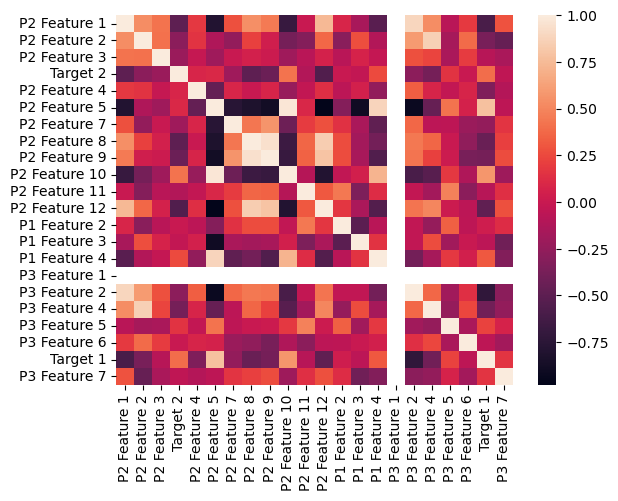

In [18]:
corr = df7.corr(numeric_only = True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

The light spots show a higher correlation, so if we look at the rows/columns associated with the Target 1,we see that there are higher correlations with P2 Features 5 and 10.  Lets find the actual correlations for all of the features compared to Target 1 to make it more clear

In [19]:
Target1corr=df7.corrwith(df7['Target 1'],numeric_only = True)
Target1corr.sort_values(ascending=[False])

Target 1         1.000000
P2 Feature 5     0.779874
P2 Feature 10    0.570314
Target 2         0.396232
P1 Feature 4     0.310293
P3 Feature 5     0.226370
P3 Feature 7     0.163536
P1 Feature 2     0.030038
P3 Feature 6    -0.054868
P1 Feature 3    -0.066201
P2 Feature 3    -0.083995
P2 Feature 11   -0.084064
P2 Feature 7    -0.246009
P2 Feature 4    -0.337971
P2 Feature 2    -0.372348
P2 Feature 9    -0.384305
P3 Feature 4    -0.403651
P2 Feature 8    -0.439915
P2 Feature 12   -0.484170
P2 Feature 1    -0.599338
P3 Feature 2    -0.728354
P3 Feature 1          NaN
dtype: float64

Here we see that the features with the highest positive correlation are P2 Features 5 and 10.  The items with the largest negative correlation are P2 Feature 1 and P3 feature 2.  Below are the detailed plots of those features to better see the correlation.

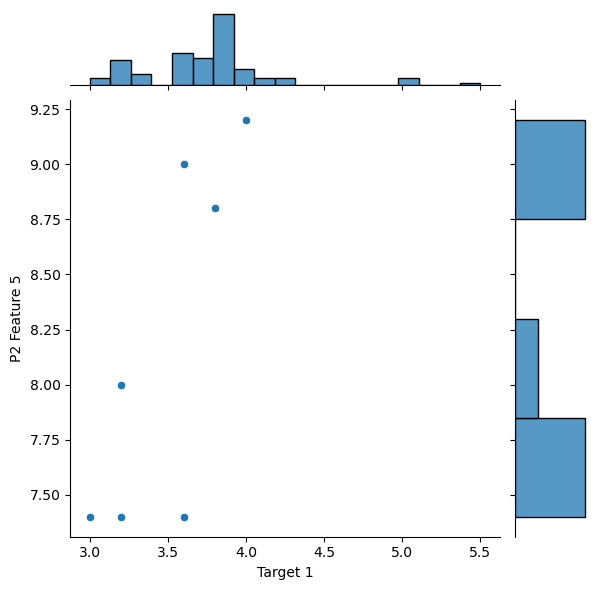

In [20]:
#positive correlation (.78)
plot=sns.jointplot(x="Target 1", y='P2 Feature 5', data=df7)

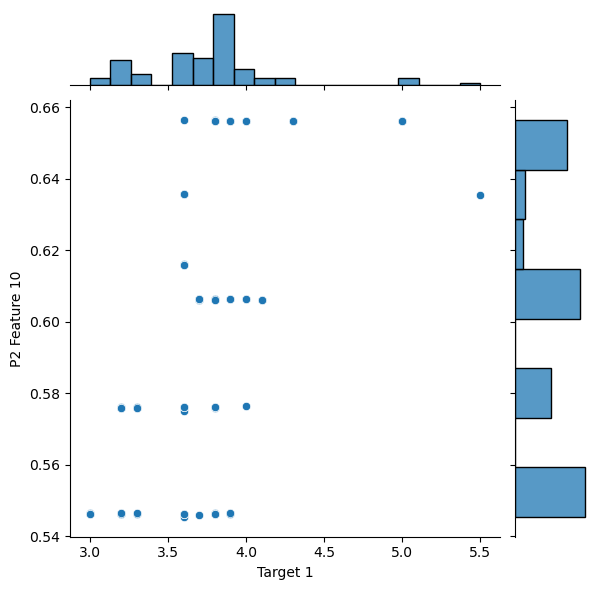

In [21]:
#positive correlation (.57)
plotP2F1=sns.jointplot(x="Target 1", y='P2 Feature 10', data=df7)

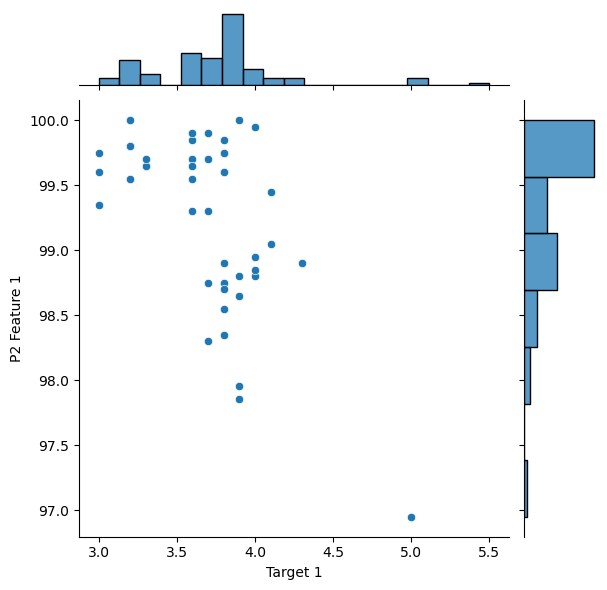

In [22]:
#negative correlation (-.60)
plotP2F1=sns.jointplot(x="Target 1", y='P2 Feature 1', data=df7)

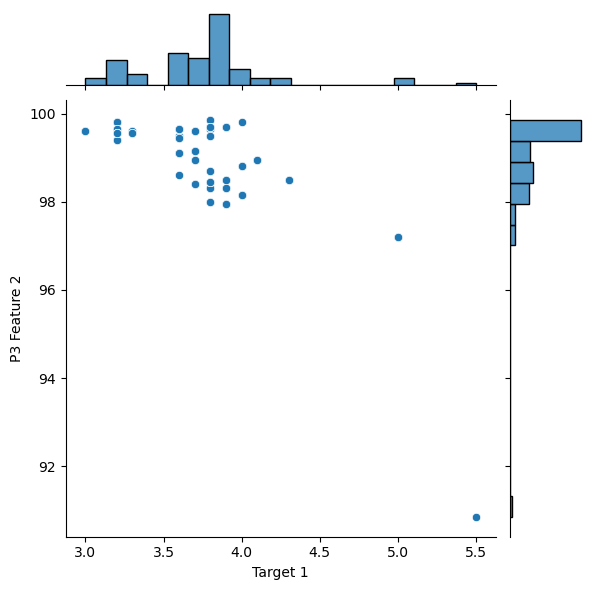

In [23]:
#negative correlation (-.73)
plotP3F2=sns.jointplot(x="Target 1", y='P3 Feature 2', data=df7)

So from this correlation analysis we see that the first two features have a pretty strong positive relationship with the Target (when Target 1 is high, they are high), while the second two have a pretty strong negative or opposite relationship (when Target 1 is high, they are low).  Lets further investigate with a regression model analysis.

## Regression Model with Pycaret

In [24]:
from pycaret.regression import *

Now we've imported the pycaret library and setup the model to normalize the data.  This allows the scale of the measurements to not affect the analysis or weight it incorrectly in the direction of the larger numbers.  With larger numbers the difference can be larger and therefore incorrectly be correlated with a larger affect.  Normalizing puts all the data on an equal scale and allows the smaller numbers to be equally analyized.

In [30]:
model = setup(session_id=4620,
    data = df7,
    target = 'Target 1',
    normalize=True)

,Description,Value
0,Session id,4620
1,Target,Target 1
2,Target type,Regression
3,Original data shape,"(93, 24)"
4,Transformed data shape,"(93, 24)"
5,Transformed train set shape,"(65, 24)"
6,Transformed test set shape,"(28, 24)"
7,Ordinal features,2
8,Numeric features,21
9,Categorical features,2


We have elected to do a Regression Model because it is better at both predicting trends and determining finding major influencers of a variable.  Now we will compare the different models with our data and see which one has the best fit.  This is done through  running each model and then calculating both the Coefficient of determination and multiple types of error (Mean Absolute Error, Mean Squared Error, Root Mean Squared Error, Root Mean Squared Logarithmic Error, and Mean absolute percentage error).  The best values of each are highlighted and the model with the most highlighted values is considered the best fit.  

In [26]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.1474,0.0916,0.2351,0.5066,0.0471,0.0372,0.0580
knn,K Neighbors Regressor,0.2087,0.0909,0.2696,0.0707,0.0553,0.0555,0.0310
rf,Random Forest Regressor,0.1911,0.0961,0.2754,0.0570,0.0565,0.0502,0.0710
gbr,Gradient Boosting Regressor,0.1760,0.0918,0.2669,-0.0484,0.0545,0.0454,0.0350
ada,AdaBoost Regressor,0.1917,0.1098,0.2822,-0.1315,0.0578,0.0493,0.0380
llar,Lasso Least Angle Regression,0.2806,0.1785,0.3739,-0.3636,0.0772,0.0747,0.0200
dummy,Dummy Regressor,0.2806,0.1785,0.3739,-0.3636,0.0772,0.0747,0.0190
en,Elastic Net,0.2806,0.1785,0.3739,-0.3636,0.0772,0.0747,0.0220
lasso,Lasso Regression,0.2806,0.1785,0.3739,-0.3636,0.0772,0.0747,0.0230
omp,Orthogonal Matching Pursuit,0.2599,0.1219,0.3223,-0.4646,0.0651,0.0689,0.0200


In [27]:
print(best)

ExtraTreesRegressor(n_jobs=-1, random_state=4620)


XXXXXXX

The best model is determined to be a Gradient Boosting Regressor.  The Gradient Boosting Regressor is an "ensemble learning algorithm that combines multiple weak learners to create a stronger model. It works by iteratively adding weak learners to the model, where each weak learner is trained to correct the mistakes made by the previous weak learners. The objective of the algorithm is to minimize the loss function, which is defined as the difference between the actual values and the predicted values." (https://medium.com/the-modern-scientist/gradient-boosting-regressor-the-best-machine-learning-algorithm-370b7b41ad09).  Now to evaluate the model to tell us the features of highest importance.



The best model is determined to be a Random Forest Regressor.  This is a bagging method, not a boosted approach.  Each model is run independantly then the results are aggregated.  To learn more about what that is, check out https://python.plainenglish.io/random-forest-regression-model-d060706a5e7f.  Now to evaluate the model to tell us the features of highest importance.

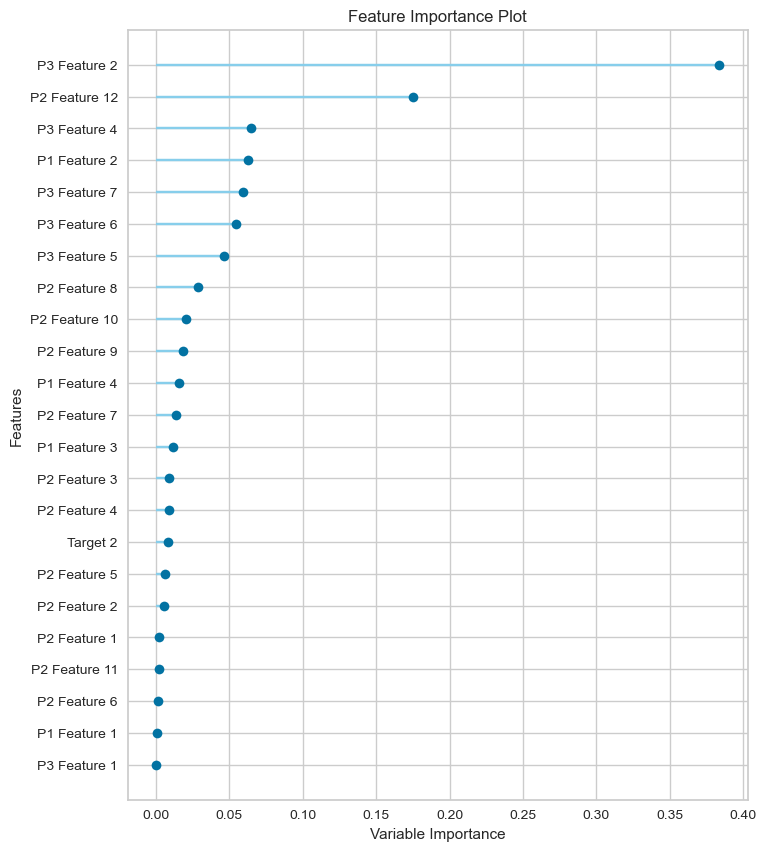

In [28]:
plot_model(best, plot = 'feature_all')

This analysis highlights the top two features (P3 Feature 2, and P2 Feature 12) that were also amoung the highest on our correlation plot.  So in this investigation we will run some tests adjusting P3 Feature 2 and see how that affects our target.  Additional testing on the other highlighted features will also be done if its still necessary.

In [29]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
dashboard(best, display_format='dash',run_kwargs={'port':7000})

Changing class type to RandomForestRegressionExplainer...
Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Calculating ShadowDecTree for each individual decision tree...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explaine

ConnectionError: HTTPConnectionPool(host='0.0.0.0', port=7000): Max retries exceeded with url: /_alive_eaa820ee-5c06-42f7-aa20-8f513b54bcb9 (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x0000029B20F74DC0>: Failed to establish a new connection: [WinError 10049] The requested address is not valid in its context'))

Click the link above to launch the Explainer Dashboard